In [8]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
from cosamp import cosamp

## Signal generation

In [9]:
n = 4096 # sample rate of high resolution signal
t = np.linspace(0, 1, n)
f1 = 70
f2 = 700
x = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)
x_fft = np.fft.fft(x)
x_PSD = x_fft * np.conj(x_fft) / n

## random sampling

In [10]:
p = 128 # number of random samples
perm = np.floor(np.random.rand(p) * n).astype(int)
y = x[perm]

## plot time- and PSD-signal

/home/paulwl/miniconda3/envs/cs_example/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


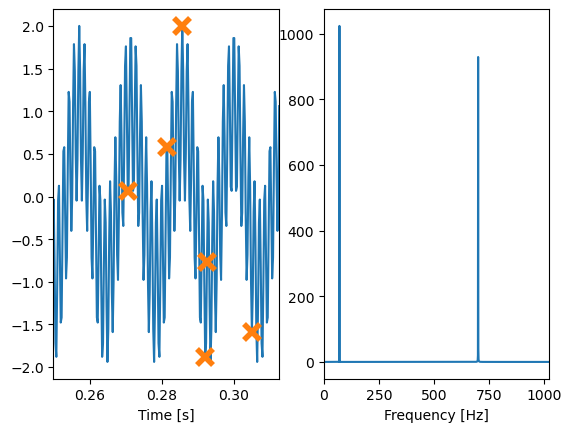

In [11]:
time_window = np.array([1024, 1280]) / n
freq = np.arange(n)
L = int(np.floor(n/2))

fig, axs = plt.subplots(1, 2)

axs[0].plot(t, x)
axs[0].plot(perm/n, y, marker='x', ms=12, mew=4, linewidth=0)
axs[0].set_xlim(time_window[0], time_window[1])
axs[0].set_xlabel('Time [s]')

axs[1].plot(freq[:L], x_PSD[:L])
axs[1].set_xlim(0, 1024)
axs[1].set_xlabel('Frequency [Hz]')

plt.show()

## Compressed Sensing

In [12]:
psi = dct(np.identity(n))
theta = psi[perm, :]

s = cosamp(theta, y, 10, max_iter=10)
x_recon = idct(s) # reconstruction

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


/home/paulwl/miniconda3/envs/cs_example/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/paulwl/miniconda3/envs/cs_example/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


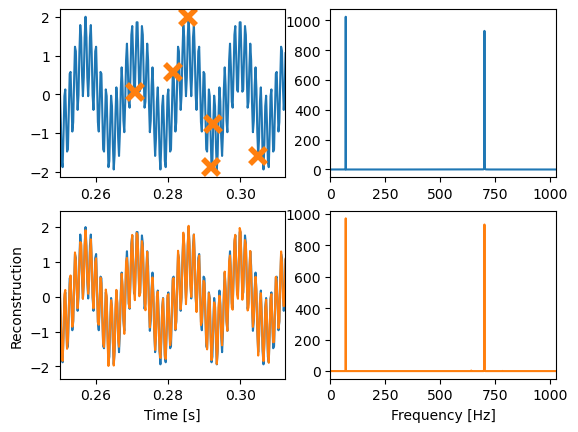

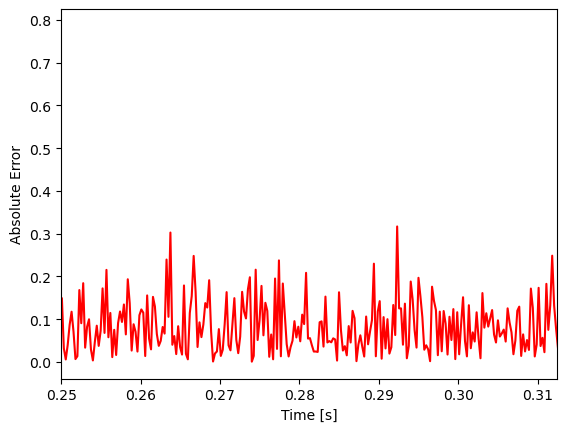

In [13]:
fig, axs = plt.subplots(2, 2)

axs[0][0].plot(t, x)
axs[0][0].plot(perm/n, y, marker='x', ms=12, mew=4, linewidth=0)
axs[0][0].set_xlim(time_window[0], time_window[1])

axs[0][1].plot(freq[:L], x_PSD[:L])
axs[0][1].set_xlim(0, 1024)

axs[1][0].plot(t, x)
axs[1][0].plot(t, x_recon, color='C1')
axs[1][0].set_xlim(time_window[0], time_window[1])
axs[1][0].set_xlabel('Time [s]')
axs[1][0].set_ylabel('Reconstruction')

x_recon_fft = np.fft.fft(x_recon, n)
x_recon_PSD = x_recon_fft * np.conj(x_recon_fft) / n

axs[1][1].plot(freq[:L], x_recon_PSD[:L], color='C1')
axs[1][1].set_xlim(0, 1024)
axs[1][1].set_xlabel('Frequency [Hz]')
plt.show()

fig, ax = plt.subplots()
ax.plot(t, np.abs(x - x_recon), color='r')
ax.set_xlim(time_window[0], time_window[1])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Absolute Error')
plt.show()